## Data Analysis Project: Bike Sharing Dataset

#### The dataset is retrieved from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

#### This project is intended towards finding which features or independent variables affects the response variable of total number of bike share users. This project also covers the Explanatory Data Analysis (EDA) of the dataset to summarize the main characteristics with the use of matplotlib and seaborn libraries of Python. 

In [99]:
#datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
#count - number of total rentals

In [1]:
#Importing required libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
#Reading the dataset from the computer location
#There are two datasets- daily dataset gives the daily ride information and hourly dataset gives the ride info by hours
df_daily = pd.read_csv('C:/Users/savan/Desktop/DS/Projects/Bike Sharing/bike_sharing_daily.csv')
df_hourly = pd.read_csv('C:/Users/savan/Desktop/DS/Projects/Bike Sharing/bike_sharing_hourly.csv')

In [3]:
#Checking how the data looks like
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Checking how the hourly data looks
df_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#Checking the shape of df_daily
df_daily.shape

(731, 16)

In [6]:
#Checking the shape of df_hourly
df_hourly.shape

(17379, 17)

In [7]:
#Checking the null values in the df_daily
df_daily.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#Checking the null values in df_hourly
df_hourly.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [24]:
#Checking the data types of the df_daily (which also shows the number of null values)
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 15 columns):
instant       731 non-null int64
season        731 non-null object
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null bool
weekday       731 non-null object
workingday    731 non-null bool
weathersit    731 non-null object
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: bool(2), category(2), float64(4), int64(4), object(3)
memory usage: 91.9+ KB


In [10]:
#Checking the data types of the df_hourly
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### From the above result, it is known that the 'workingday' is showing int64. Since we saw in the data.head() that the values are just 0 and 1, it can cause problem since it should be binary datatypes. So the next step involves converting those datatypes.

In [5]:
def fixing_datatypes(df):
    # Fixing the datatypes 
    df['dteday'] = df['dteday'].astype('datetime64')
    df.loc[:,'season':'mnth'] = df.loc[:,'season':'mnth'].astype('category')
    df[['holiday','workingday']] = df[['holiday','workingday']].astype('bool')
    df[['weekday','weathersit']] = df[['weekday','weathersit']].astype('category')

    # Get Meaningful Names for the categorial Variables
    mapping_season = {1:"1_Winter", 2:"2_Spring", 3:"3_Summer", 4:"4_Fall" }
    mapping_weekdays = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 
                        4:"Thursday", 5:"Friday", 6:"Saturday"}
    mapping_weather = {1:"good", 2:"medium", 3:"poor", 4:"very_poor" }
    
    df["season"] = df.season.map(mapping_season)
    df["weekday"] = df.weekday.map(mapping_weekdays)
    df["weathersit"] = df.weathersit.map(mapping_weather)
      
    return df

In [6]:
df_daily = fixing_datatypes(df_daily)
df_hourly = fixing_datatypes(df_hourly)

df_hourly['hr'] = df_hourly['hr'].astype('category')

In [7]:
#Setting up 'dteday' as index, which will be easier down the road to sort the data.
df_daily.set_index('dteday', inplace = True)

In [8]:
#Now Checking the updated dataset
df_daily.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1_Winter,0,1,False,Saturday,False,medium,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1_Winter,0,1,False,Sunday,False,medium,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1_Winter,0,1,False,Monday,True,good,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1_Winter,0,1,False,Tuesday,True,good,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1_Winter,0,1,False,Wednesday,True,good,0.226957,0.229270,0.436957,0.186900,82,1518,1600


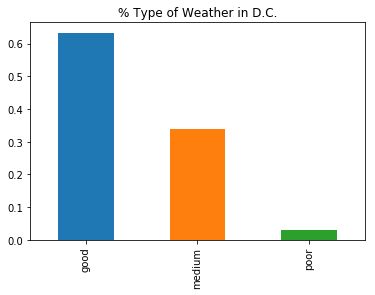

In [8]:
#Let's started analyzing and understanding the dataset better
df_daily['weathersit'].value_counts(normalize = True).plot(kind = 'bar', title = '% Type of Weather in D.C.')

#### Nearly two-thirds times the weather in D.C. was good and little less than one-third the weather was Medium and there was very less chance that the weather was poor in that timeframe.

#### Now let's found the number of days the weather was good, medium or poor in different season: Winter, Spring, Summer and Fall?

In [9]:
#How is the weather in D.C. in different seasons?
pd.crosstab(df_daily.weathersit, df_daily.season)

season,1_Winter,2_Spring,3_Summer,4_Fall
weathersit,,,,
good,111,113,136,103
medium,66,68,48,65
poor,4,3,4,10


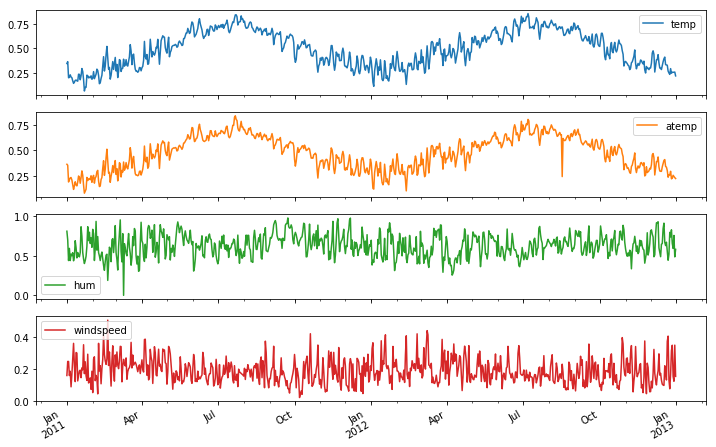

In [11]:
df_daily.loc[:,'temp':'windspeed'].plot(subplots=True, figsize = (12, 8))
plt.xlabel("")
plt.show()

#### Variables temp and atemp seems to be highly correlated and found to be following the trend closely, we will delete that variable to avoid multicollinearity. While variable hum and windspeed seems to have accepted some noise.

#### Now, let's focus on the response variable we are going to predict (the number of bike rentals). It shows that in the late 2012 and warly 2013, there is quite decrease in the number of rentals.

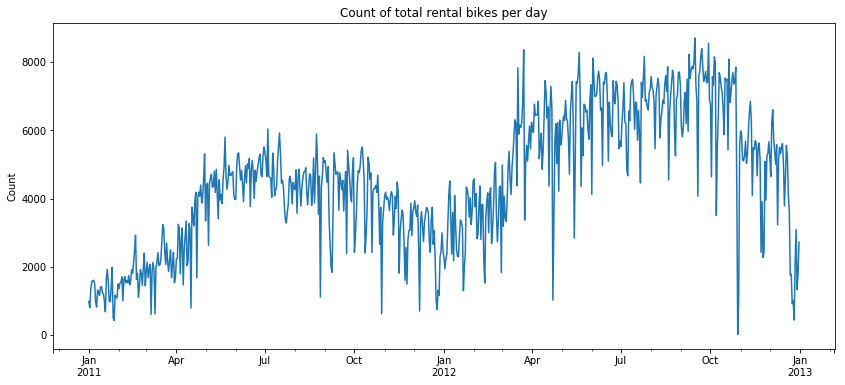

In [10]:
df_daily.cnt.plot(title = "Count of total rental bikes per day", figsize=(14, 6))
plt.xlabel("")
plt.ylabel("Count")
plt.show()

#### We can use month instead of daily count to get more smooth curve and understand the trend better. It looks like that there is a big dip in the month of February (Finding out the reason that why there was steep decrease in the demand)

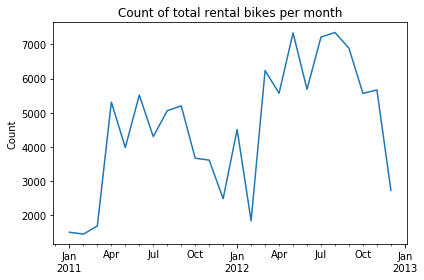

In [30]:
df_daily.asfreq('M').cnt.plot(title = "Count of total rental bikes per month")
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\savan\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


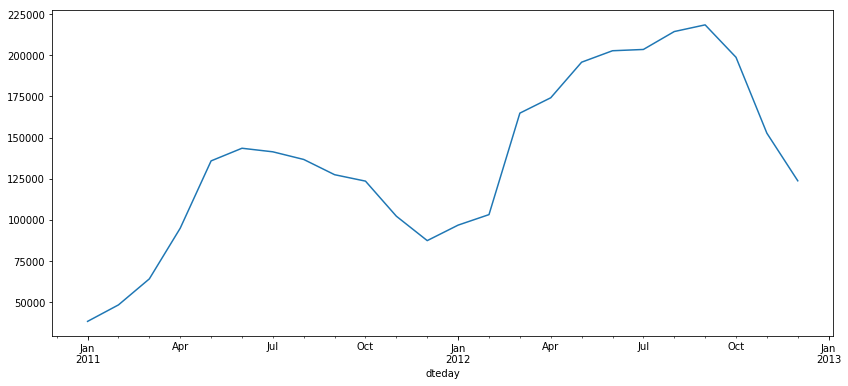

In [13]:
df_daily.resample('M', how = 'sum')['cnt'].plot(kind = 'line', figsize = (14, 6))

#### The above graph shows the total number of users per month over a timeframe. Surprisingly, there is a increase in the number of users during the summer months while there is quite decrease in the winter months. Let's dig in more why this is happening.

#### Also, let's check the relation between the casual and registered users and what trend they are showing over the period of time.

In [31]:
df_daily['Date'] = df_daily.index

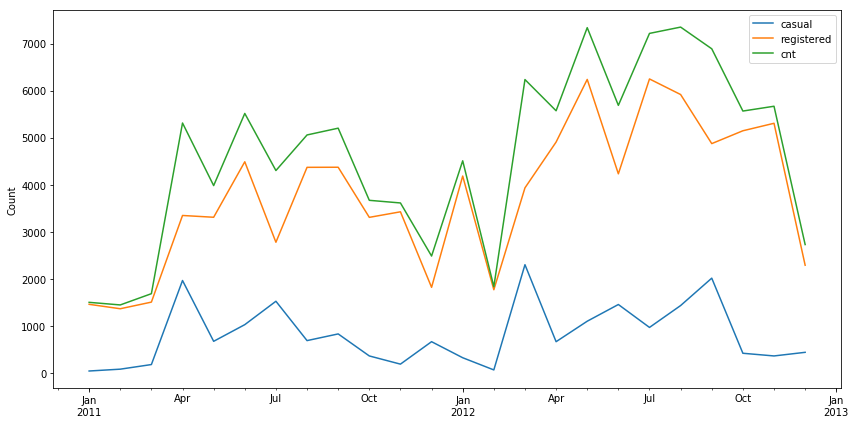

In [11]:
df_daily[['casual','registered','cnt']].asfreq('M').plot(figsize = (12, 6))
plt.xlabel("")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


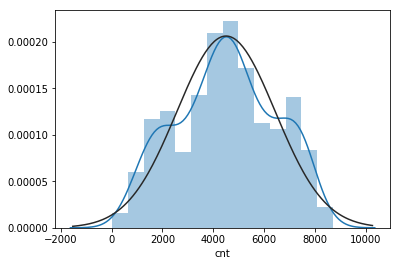

In [37]:
#The distribution of the daily count is approximately normally distributed with little bumps on both sides.
sns.distplot(df_daily.cnt, fit = stats.norm)

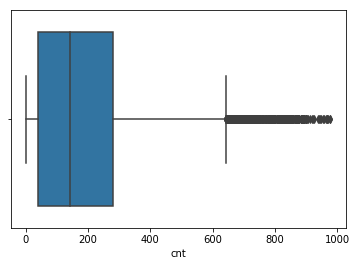

In [38]:
#Let's check the distribution of the hourly counts.
sns.boxplot(df_hourly.cnt)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


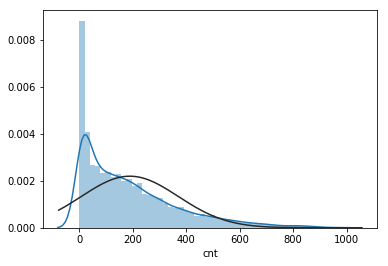

In [39]:
#This makes sense since there are many outliers in the right.
sns.distplot(df_hourly[df_hourly.cnt >= 0]['cnt'], fit = stats.norm)

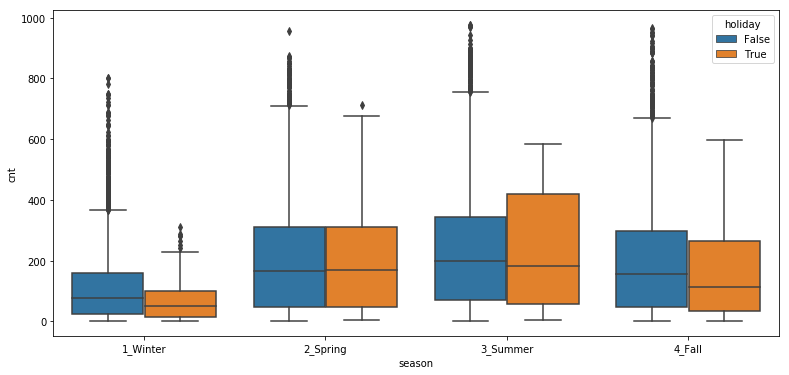

In [40]:
#Let's check when actually there are excessively more users that is skewing the distribution?
plt.figure(figsize=(13, 6))
sns.boxplot(x = df_hourly.season, y = df_hourly.cnt, data = df_hourly, hue='holiday')

#### It can be observed that during the holidays people are less likely to take a ride as compared to non-holiday days. It can be seen from above that, the distribution is skewed mainly due to the excessive number of users on non-holiday days. That acutally makes sense since it is more likely that people during holidays are at home and spending time with families. Let's research little more in-depth.

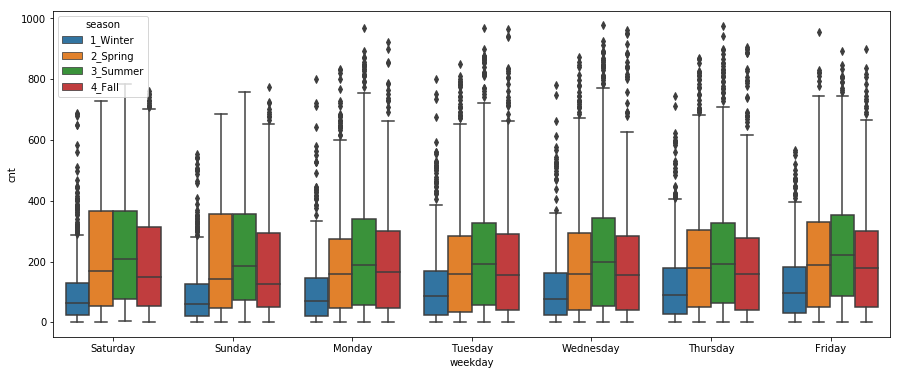

In [43]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = df_hourly.weekday, y = df_hourly.cnt, data = df_hourly, hue='season')

#### This looks very detailed but it is very informative. It tells that it is more likely to have a more number of rides during weekdays rather than on weekends. On an average irrespective of seasons, it is more likely to have more number of rides during the weekdays.

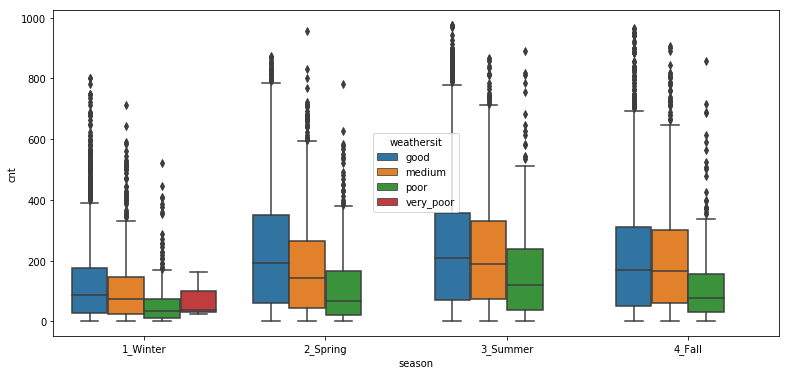

In [41]:
plt.figure(figsize=(13, 6))
sns.boxplot(x = df_hourly.season, y = df_hourly.cnt, data = df_hourly, hue='weathersit')

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


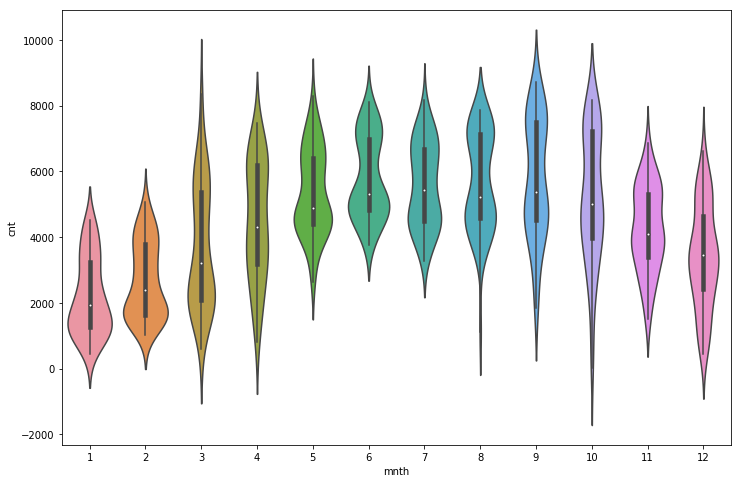

In [69]:
plt.figure(figsize = (12, 8))
sns.violinplot(x='mnth', y = 'cnt', data = df_daily)

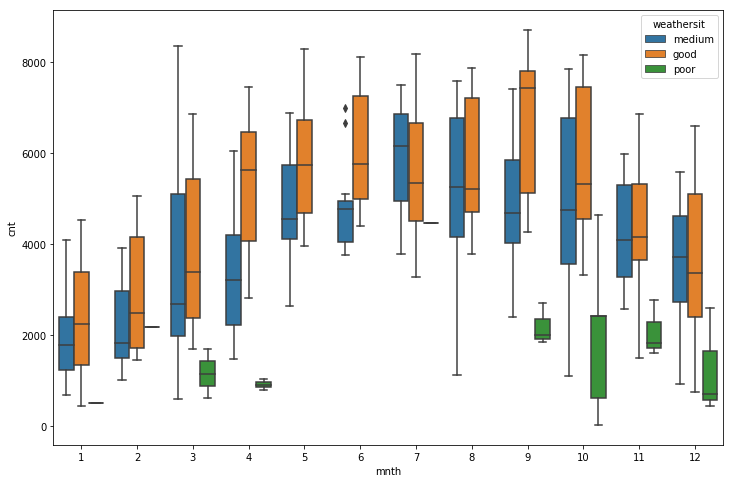

In [71]:
plt.figure(figsize = (12, 8))
sns.boxplot(x="mnth", y="cnt", hue = 'weathersit', data=df_daily)
plt.show()

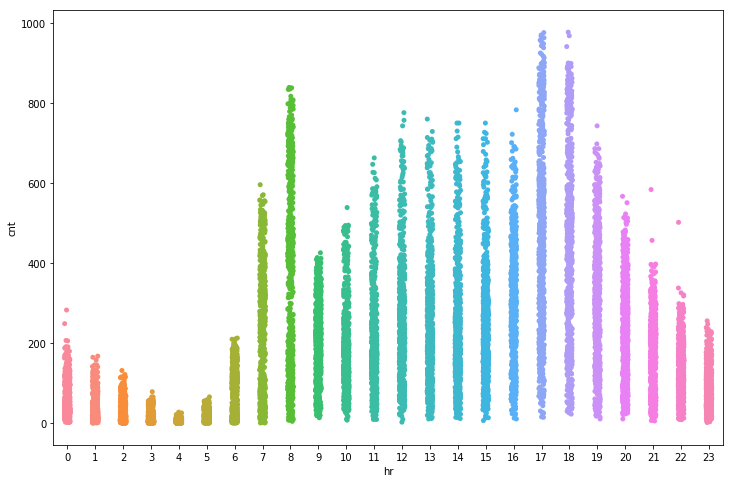

In [73]:
plt.figure(figsize = (12, 8))
sns.stripplot(x="hr", y="cnt", data=df_hourly)
plt.show()

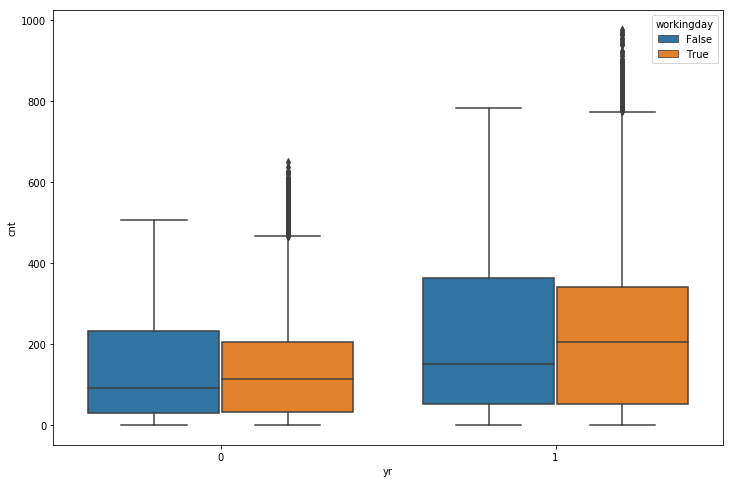

In [75]:
plt.figure(figsize = (12, 8))
sns.boxplot(x="yr", y="cnt", hue = 'workingday', data=df_hourly)
plt.show()

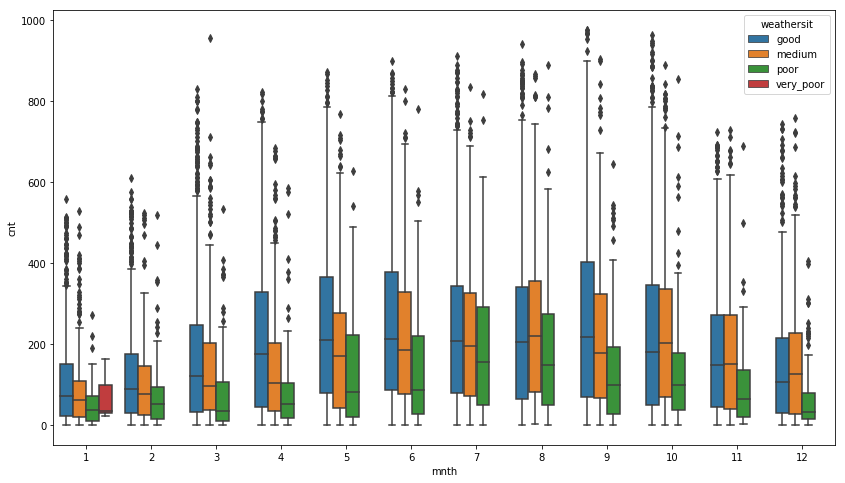

In [77]:
plt.figure(figsize = (14, 8))
sns.boxplot(x="mnth", y="cnt", hue = 'weathersit', data=df_hourly)
plt.show()

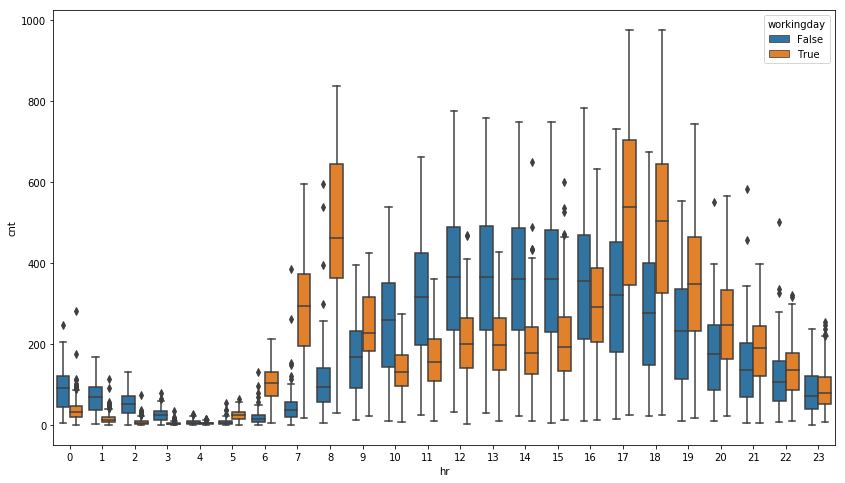

In [78]:
plt.figure(figsize = (14, 8))
sns.boxplot(x="hr", y="cnt", hue = 'workingday', data=df_hourly)
plt.show()

#### Let's research more on outliers.

In [12]:
df_daily[df_daily.cnt == df_daily.cnt.min()]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-10-29,668,4_Fall,1,10,False,Monday,True,poor,0.44,0.4394,0.88,0.3582,2,20,22


#### The 10/29/2012 was a official working day but the internet says that the red alert was declared in city for Hurricane Sandy and that is the reason for very less number of riders. So technically, it is not a outlier.

In [13]:
df_daily[df_daily.cnt == df_daily.cnt.max()]

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2012-09-15,624,3_Summer,1,9,False,Saturday,False,good,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


#### It was typical Saturday and the total count does not surprise us too much.

#### Now it is a time to understand the relation between our feature and response variables. It looks like registered and casual users behave differently and also there is seasonal effect and increasing trend (by month) does not fully incorporate the detailed variance (daily). It may happen that other feature may be response for that variance. Conditional means are good way to start. It quickly notice possible effect of independent variables on our dependent variable.

#### The mean rentals per day of all datapoints serves as our benchmark:

In [17]:
df_daily.cnt.mean()

4504.3488372093025

#### Let's check out how it is related in the different weather. In which season people are more likely to take a ride? It turns out that people are more likely to use bikes when the weather is good or medium. 

### So definitely, weather affects the total number of bike rides.

In [18]:
df_daily.groupby('weathersit')['cnt'].mean()

weathersit
good      4876.786177
medium    4035.862348
poor      1803.285714
Name: cnt, dtype: float64

In [19]:
df_daily.resample('A').cnt.mean()

dteday
2011-12-31    3405.761644
2012-12-31    5599.934426
Freq: A-DEC, Name: cnt, dtype: float64

#### The 2011 was the year of introduction of the bikes, so it takes time for customers to understand the concept of bikes sharing. But in the following year, the number of users definitely increased. Since this is sorted by year, it does not gives detailed information about how each of the months were performing. Let's go little deeper in months.

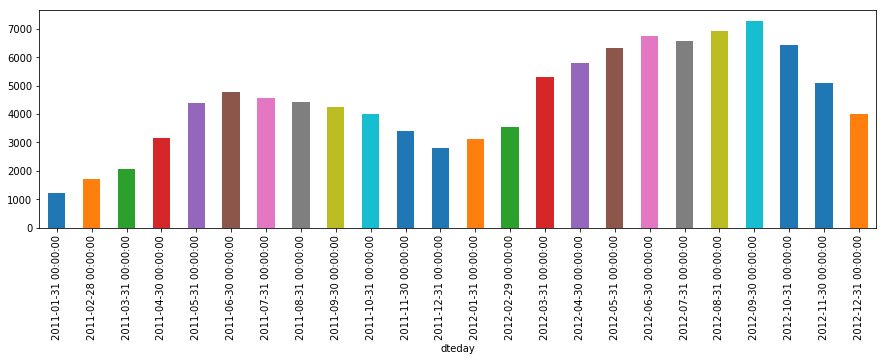

In [27]:
df_daily.resample('M').cnt.mean().plot(kind = 'bar', figsize = (15, 4))

#### The graph confirms that the business revenue is increasing but there is interesting increase in the number of riders during the summer months while there is dip in the winter. Let's analyze the results by revenue of the season.

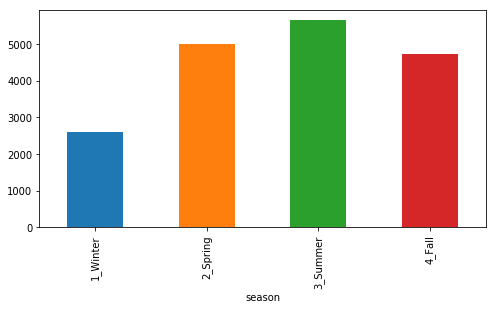

In [29]:
df_daily.groupby('season')['cnt'].mean().plot(kind = 'bar', figsize = (8, 4))

#### Winter has the lowest average number of riders as compared to other season, while summer has the highest average number of riders. Because of very cold days during winter in D.C., riders are less likely to take a bike ride. From a business development perspective, there should be introduction of some promotions that can help in increasing the winter revenue.

In [30]:
df_daily.groupby('workingday')['cnt'].mean()

workingday
False    4330.168831
True     4584.820000
Name: cnt, dtype: float64

#### There is almost no difference in the average number of riders on weekend and weekdays. But on holidays less number of bikes has been rented. That means that there is possibility that riders on weekend tend to rent it for more times rather than on weekdays. That also means that, weekday riders are more responsible for short distances rentals while long distance rentals on weekends. 

In [31]:
df_daily.groupby('holiday')['cnt'].mean()

holiday
False    4527.104225
True     3735.000000
Name: cnt, dtype: float64

#### There is effect of holidays and weather on the number of bike riders. It has not to be concluded right now since we haven't performed hypothesis testing. But this has to be kept in mind that which features affect our response variable.

In [34]:
df_daily.groupby(['holiday','weathersit'])['cnt'].mean()

holiday  weathersit
False    good          4905.154018
         medium        4061.684647
         poor          1803.285714
True     good          4029.533333
         medium        2998.666667
Name: cnt, dtype: float64

#### Just in this dataset, it happened to be no poor weather on holiday, but it is to be never assumed. But on the days with medium weather on holidays, the effect on the ridership is seen but cannot be confirmly concluded.

In [35]:
df_daily.groupby(['workingday','weathersit'])['cnt'].mean()

workingday  weathersit
False       good          4587.269231
            medium        3936.828571
            poor          1815.400000
True        good          5023.902280
            medium        4075.028249
            poor          1799.500000
Name: cnt, dtype: float64

#### It happened to be no considerable difference between the working day and non-working day.

In [38]:
df_daily.groupby(['holiday','season'])['cnt'].mean()

holiday  season  
False    1_Winter    2640.994253
         2_Spring    4994.177778
         3_Summer    5642.923913
         4_Fall      4752.680233
True     1_Winter    1687.857143
         2_Spring    4909.250000
         3_Summer    5707.750000
         4_Fall      4025.333333
Name: cnt, dtype: float64

#### It happened to be following same pattern on holidays and non-holidays.

In [41]:
df_daily.groupby(['workingday','season'])['cnt'].mean()

workingday  season  
False       1_Winter    2257.098361
            2_Spring    5142.428571
            3_Summer    5474.666667
            4_Fall      4606.210526
True        1_Winter    2780.541667
            2_Spring    4926.664062
            3_Summer    5718.114504
            4_Fall      4785.611570
Name: cnt, dtype: float64

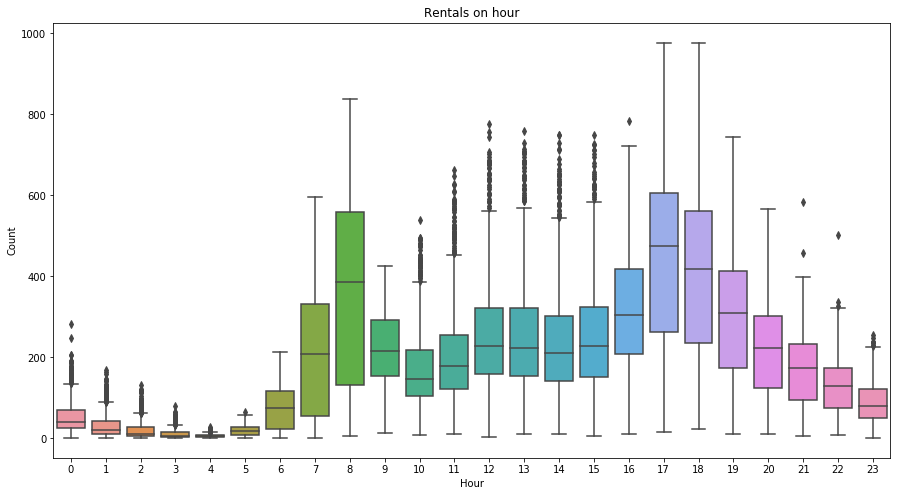

In [46]:
plt.figure(figsize=(15, 8))
sns.boxplot(df_hourly['hr'], df_hourly['cnt'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Rentals on hour")
plt.show()

#### Box plots are sometimes best to get insights from the datasets. The above boxplot shows the number of bike rentals over the hours of a day. It clearly shows that the median number of bike rentals in peak hours is more than non-peak and night hours. People are more likely to use during the day time rather than on night hours. This also direct us that bike system may be helpful in the customer's last mile travel. (for ex. from home to bus station, train station, to grab a coffee, breakfast, etc.)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


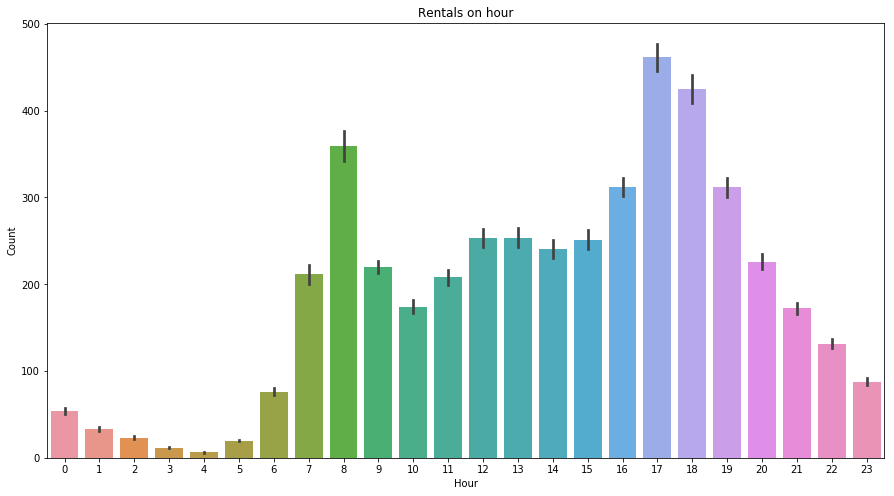

In [47]:
plt.figure(figsize=(15, 8))
sns.barplot(df_hourly['hr'], df_hourly['cnt'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Rentals on hour")
plt.show()

#### The bar graph shows the total number of rentals on a specific hour of the day. There are peaks on the 8 am in the morning and on 5 and 6 pm during evening. The rentals are highly related to the peak hours of the day (from a commuting perspective) when most people may be travelling to work. After peak hours, the total rentals also remains considerable high during the day time till 9-10 pm. From a business development perspective, more adverts should be focused on their morning and evening commute to and from work since they are more likely to use during that time.

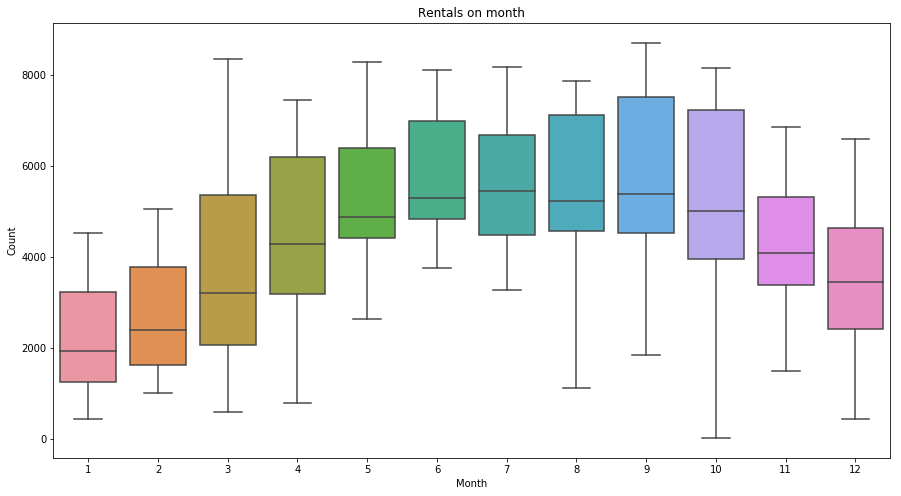

In [49]:
plt.figure(figsize=(15, 8))
sns.boxplot(df_daily.index.month, df_daily['cnt'])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Rentals on month")
plt.show()

#### The median rentals are high in the summer months rather than on winter months. It increase from the Feb-March and decreases around the month of October. There should be some more promotions or coupons marketed during winter months to increase the revenue.

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


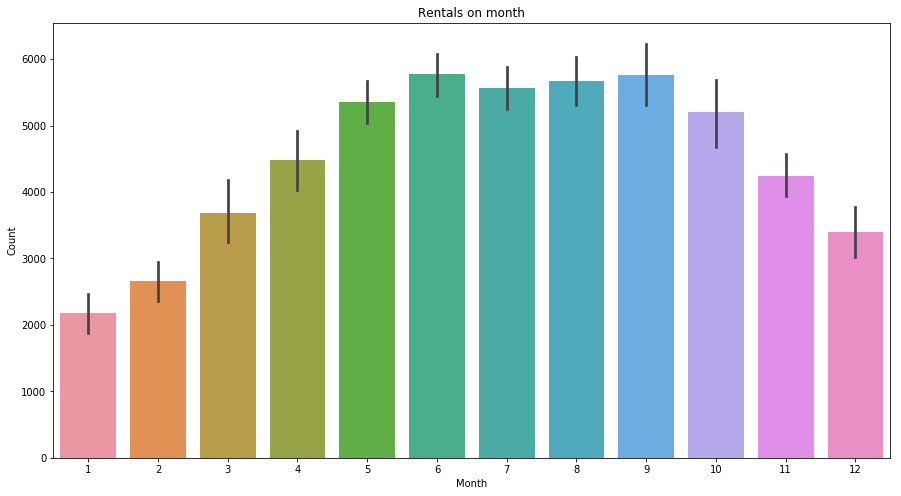

In [50]:
plt.figure(figsize=(15, 8))
sns.barplot(df_daily.index.month, df_daily['cnt'])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Rentals on month")
plt.show()

#### The above bar plot shows the total number of bike rentals per month. There is constant increase in the number of rentals during the first half of the year and decrease in the second half of the year.

In [81]:
df_daily.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

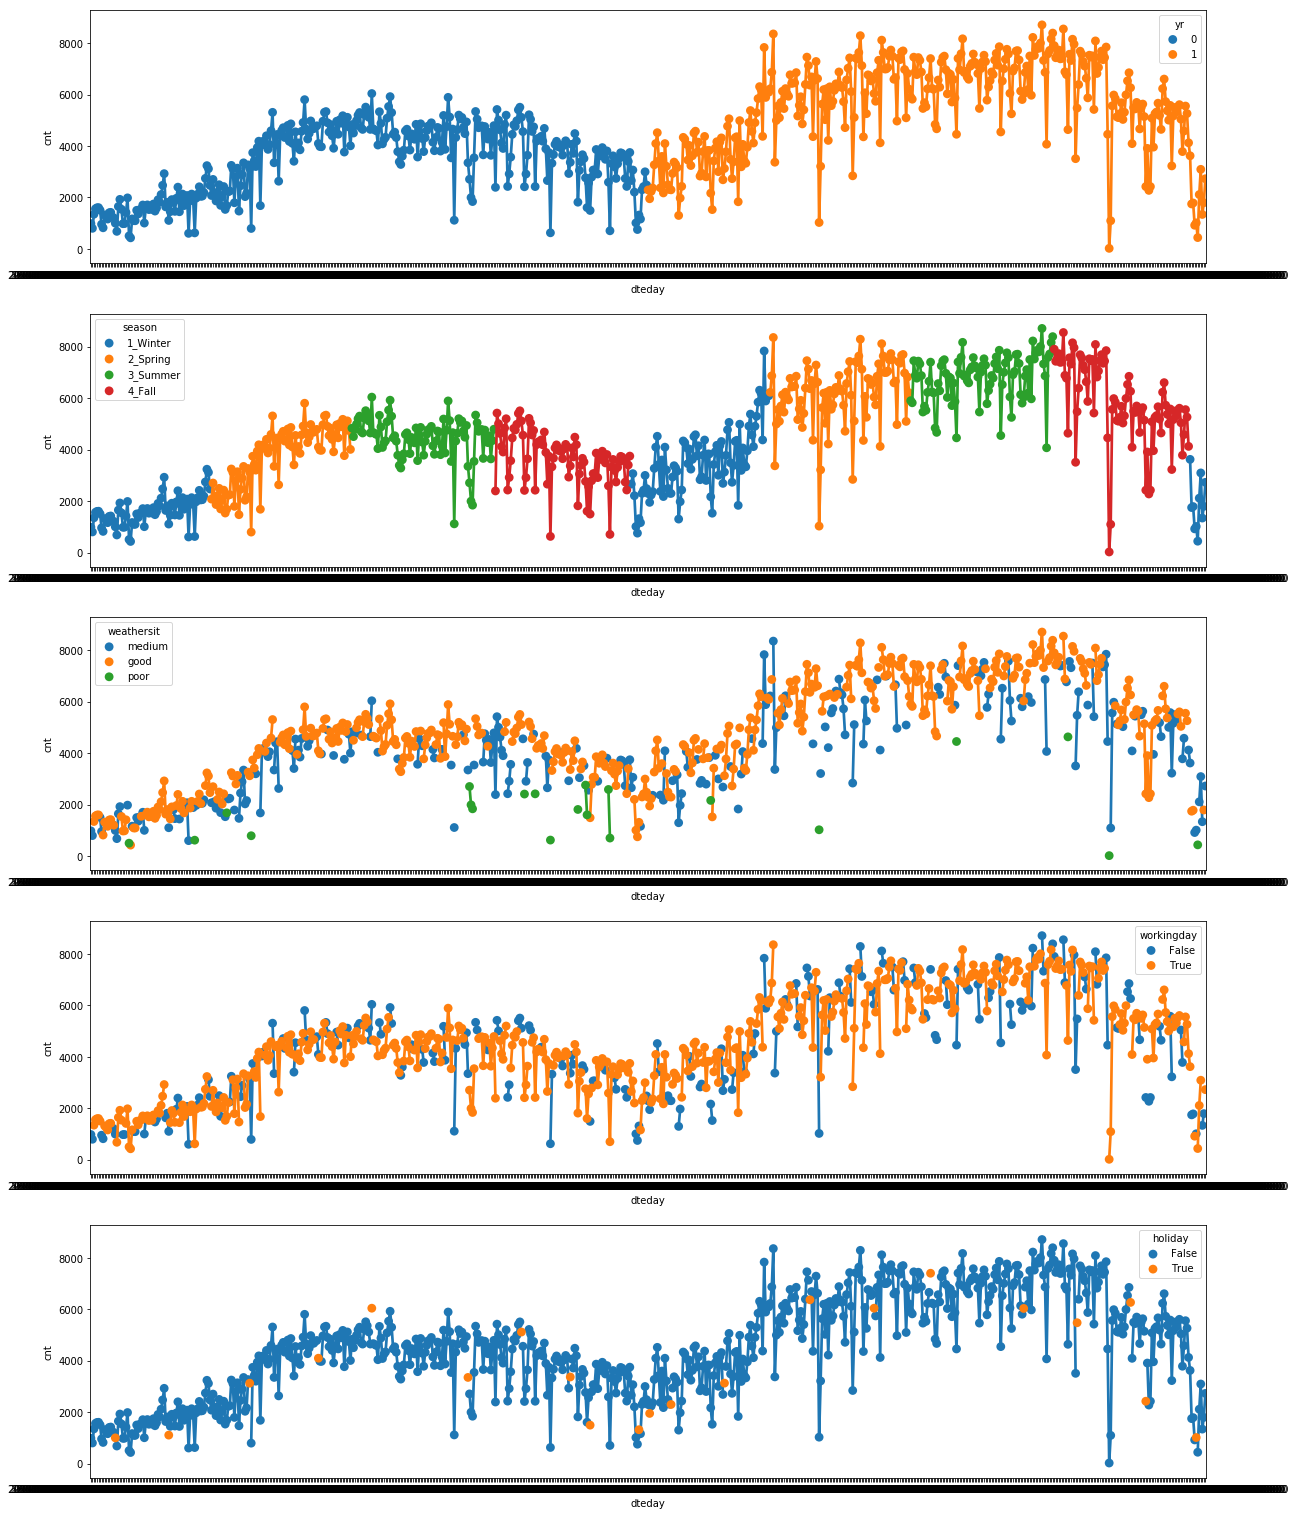

In [97]:
f,ax=plt.subplots(nrows=5)
f.set_size_inches(20,27)
sns.pointplot(x= df_daily.index, y="cnt", data=df_daily, hue='yr', ax=ax[0])
sns.pointplot(x= df_daily.index, y="cnt", data=df_daily, hue='season', ax=ax[1])
sns.pointplot(x= df_daily.index, y="cnt", data=df_daily, hue='weathersit',ax=ax[2])
sns.pointplot(x= df_daily.index, y="cnt", data=df_daily, hue='workingday',ax=ax[3])
sns.pointplot(x= df_daily.index, y="cnt", data=df_daily, hue='holiday', ax=ax[4])

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


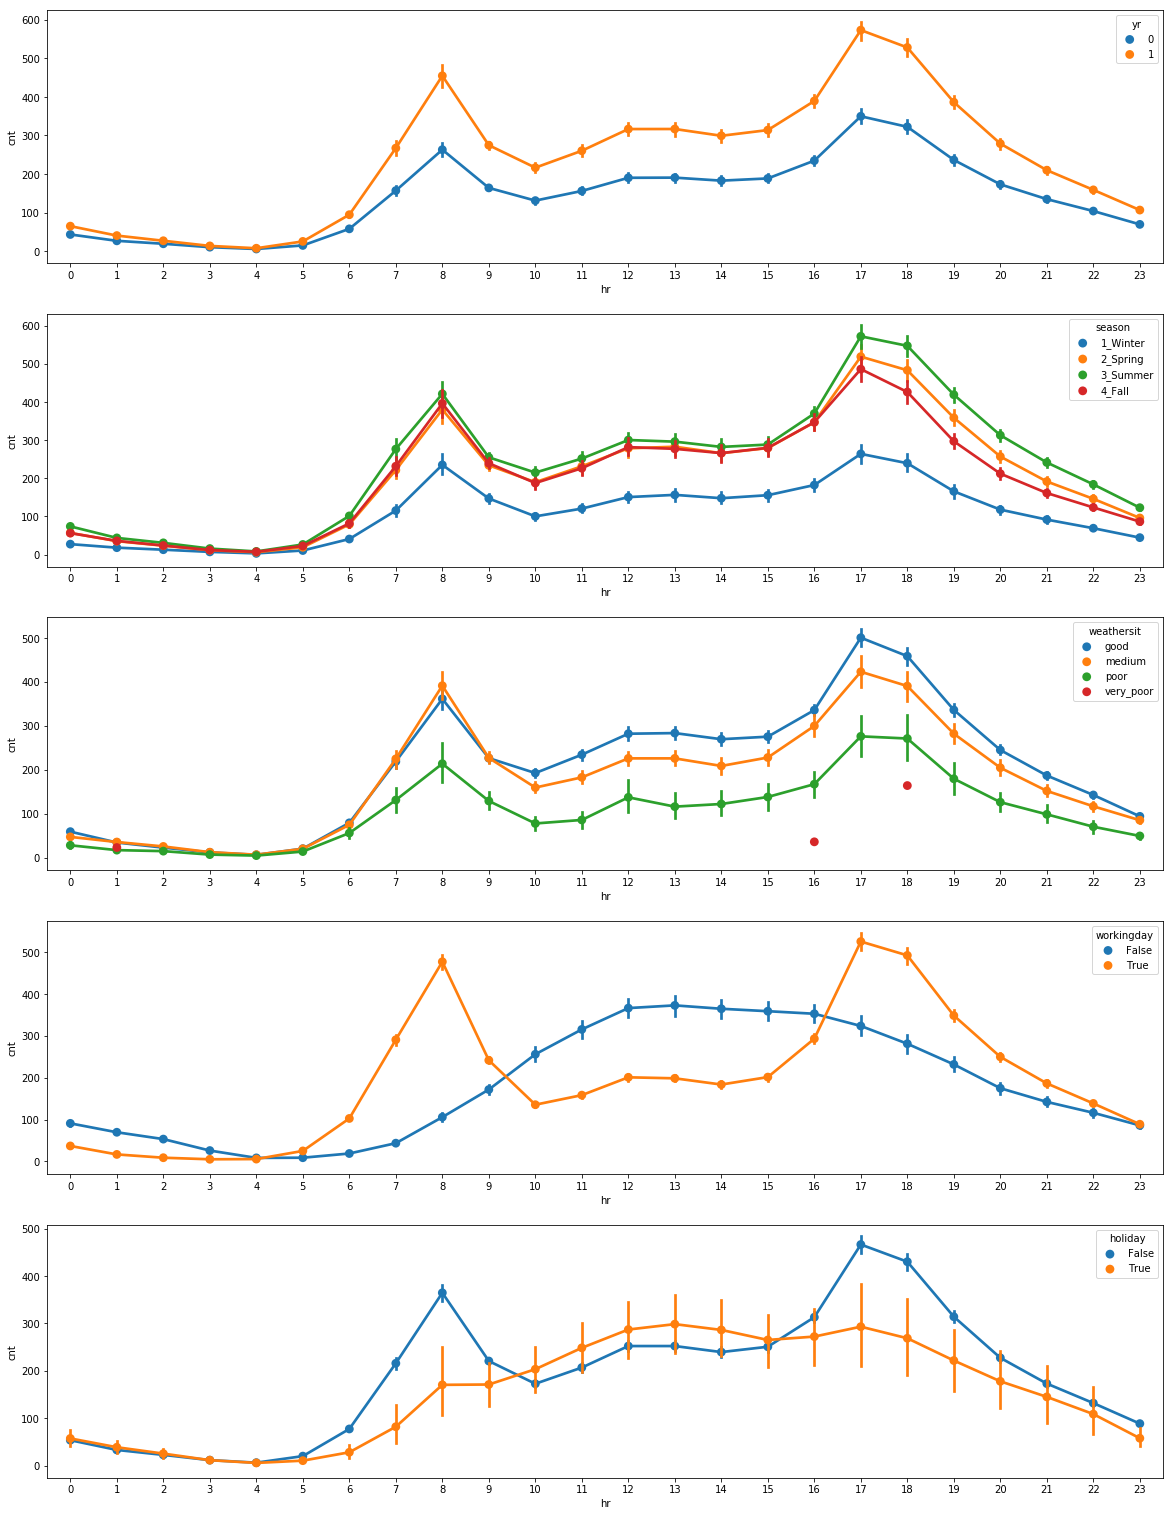

In [85]:
f,ax=plt.subplots(nrows=5)
f.set_size_inches(20,27)
sns.pointplot(x="hr",y="cnt",data=df_hourly, hue='yr',ax=ax[0])
sns.pointplot(x="hr",y="cnt",data=df_hourly, hue='season',ax=ax[1])
sns.pointplot(x="hr",y="cnt",data=df_hourly, hue='weathersit',ax=ax[2])
sns.pointplot(x="hr",y="cnt",data=df_hourly, hue='workingday',ax=ax[3])
sns.pointplot(x="hr",y="cnt",data=df_hourly, hue='holiday',ax=ax[4])

### Observations

#### Bike demand increases at 8 am and from 5 pm to 6 pm on a working day. While on non-working day it shows a steady increase (instead of spike) from 7 am to 1 pm in the afternoon and then steady decrease till the midnight.
#### Bike demand for Summer, Fall and Spring season was same across all hours, while for winter it is lower than the other seasons.
#### Bike demand is higher during the afternoon hours when there is working day, it is also higher on days which are holidays.

In [65]:
df_tmp = pd.get_dummies(df_daily.weathersit)
corr = pd.concat([df_tmp, df_daily], axis=1).corr()

In [66]:
corr

,good,medium,poor,instant,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
good,1.000000,-0.938964,-0.226050,0.015848,0.028875,-0.059165,0.116091,0.114951,-0.575317,-0.003964,0.221928,0.216298,0.252870
medium,-0.938964,1.000000,-0.122859,-0.007566,-0.018972,0.050099,-0.097706,-0.094253,0.491834,-0.037408,-0.167439,-0.140962,-0.172879
poor,-0.226050,-0.122859,1.000000,-0.024295,-0.029577,0.028820,-0.058238,-0.064727,0.267011,0.117362,-0.166103,-0.224835,-0.239958
instant,0.015848,-0.007566,-0.024295,1.000000,0.016145,-0.004337,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
holiday,0.028875,-0.018972,-0.029577,0.016145,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.059165,0.050099,0.028820,-0.004337,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.116091,-0.097706,-0.058238,0.150580,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.114951,-0.094253,-0.064727,0.152638,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,-0.575317,0.491834,0.267011,0.016375,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.003964,-0.037408,0.117362,-0.112620,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545


In [67]:
corr['cnt'].sort_values(ascending = False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
good          0.252870
workingday    0.061156
holiday      -0.068348
hum          -0.100659
medium       -0.172879
windspeed    -0.234545
poor         -0.239958
Name: cnt, dtype: float64

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


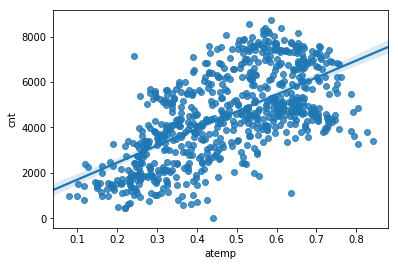

In [94]:
sns.regplot(x = 'atemp', y = 'cnt', data = df_daily)

In [95]:
df_daily.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


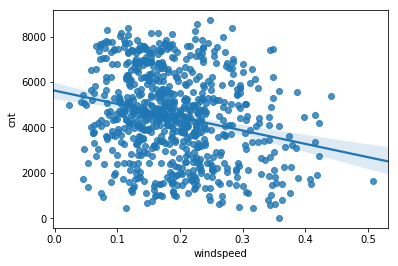

In [91]:
sns.regplot(x = 'windspeed', y = 'cnt', data = df_daily)

C:\Users\savan\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


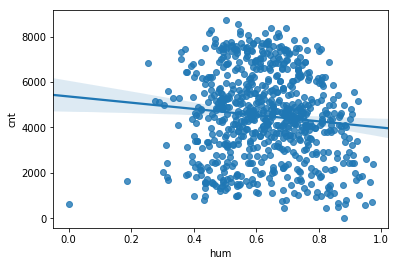

In [92]:
sns.regplot(x = 'hum', y = 'cnt', data = df_daily)

### Conclusion from the regression plots

#### With the increase in the real feel weather (atemp), the bike demand also increases. People are more likely to use the service in good weather rather than in poor and very poor weather.

#### With the decrease in windspeed, the bike demand increases. People are more likely to ride a bike when there is not or less windy.

#### With the decrease in humidity (hum), the bike demand increases. People are more likely to ride a bike in less humid weather than humid weather. 'hum' is not as correlated as the windspeed to the bike demand.